In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
from cartopy import crs as ccrs

from PIL import ImageColor
from matplotlib.colors import rgb2hex
from generativepy.color import Color
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import plotly.express as px

from shapely.geometry import Point
from shapely.geometry import Point, LineString

pd.set_option('display.max_colwidth', 25)
plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.figsize']=(12, 6)

In [2]:
gdf = gpd.read_parquet('./gridData.geo.parquet')

world = gpd.read_file('/media/system/shapefiles/TM_WORLD_BORDERS/TM_WORLD_BORDERS-0.3.zip')
world = world.simplify(0.03)

In [3]:
def hex_to_Color(hexcode):
    rgb = ImageColor.getcolor(hexcode, 'RGB')
    rgb = [v/256 for v in rgb]
    rgb = Color(*rgb)
    return rgb

def corner2list(c00,c10,c01,c11,percentile_bounds):
    
    c00 = hex_to_Color(c00)
    c10 = hex_to_Color(c10)
    c01 = hex_to_Color(c01)
    c11 = hex_to_Color(c11)

    num_grps = len(percentile_bounds)
    c00_to_c10 = []
    c01_to_c11 = []
    colorlist = []
    for i in range(num_grps):
        c00_to_c10.append(c00.lerp(c10, 1/(num_grps-1) * i))
        c01_to_c11.append(c01.lerp(c11, 1/(num_grps-1) * i))
    for i in range(num_grps):
        for j in range(num_grps):
            colorlist.append(c00_to_c10[i].lerp(c01_to_c11[i], 1/(num_grps-1) * j))

    ### convert back to hex color
    colorlist = [rgb2hex([c.r, c.g, c.b]) for c in colorlist]
    return colorlist

In [4]:
percentile_bounds = [33.3, 66.6, 100]
hex1, hex2, hex3 = ['#FC600A','#FCCC1A', '#347C98']

hex12  = corner2list('#ffffff','#3db7e4',hex1,hex2,percentile_bounds)[5]
hex13  = corner2list('#ffffff','#3db7e4',hex1,hex3,percentile_bounds)[5]
hex23  = corner2list('#ffffff','#3db7e4',hex2,hex3,percentile_bounds)[5]
hex123 = corner2list('#ffffff','#3db7e4',hex12,hex3,percentile_bounds)[5]

In [5]:
def mcolor(v1, v2, v3, hex1, hex2, hex3):
    
    #hex1, hex2, hex3 = ['#FC600A','#FCCC1A', '#347C98']

    hex12  = corner2list('#ffffff','#3db7e4',hex1,hex2,percentile_bounds)[5]
    hex13  = corner2list('#ffffff','#3db7e4',hex1,hex3,percentile_bounds)[5]
    hex23  = corner2list('#ffffff','#3db7e4',hex2,hex3,percentile_bounds)[5]
    hex123 = corner2list('#ffffff','#3db7e4',hex12,hex3,percentile_bounds)[5]
    
    if v1>=0:
        if v2>=0:
            if v3>=0:
                c = '#000000'
            else:
                c = hex12
        else:
            if v3>=0:
                c = hex13
            else:
                c = hex1
    else:
        if v2>=0:
            if v3>=0:
                c = hex23
            else:
                c = hex2
        else:
            if v3>=0:
                c = hex3
            else:
                c = '#c2c2c2'
    return c
    
gdf['color'] = gdf.apply(lambda x: mcolor(x['delta_heat'], x['delta_BO'],
                                        x['delta_LowEx'], '#FC600A','#FCCC1A', '#347C98'), axis=1)
gdf

,index,geometry,BO_1980_n,BO_2010_n,LowEx_1980_n,LowEx_2010_n,Heat_1980_n,Heat_2010_n,delta_BO,delta_LowEx,delta_heat,color
0,16720,POLYGON ((-66.00000 -...,0.383000,0.352000,19.477911,0.000000,4.393316,5.820900,-0.031000,-19.477911,1.427584,#FC600A
1,18161,POLYGON ((-69.00000 -...,0.108000,0.022000,20.335890,0.000000,6.154737,6.188800,-0.086000,-20.335890,0.034063,#FC600A
2,18167,POLYGON ((-63.00000 -...,0.242112,0.140639,10.782440,12.619829,4.510310,5.976957,-0.101473,1.837390,1.466647,#976e51
3,18522,POLYGON ((-69.00000 -...,0.082659,0.015139,9.090363,19.136811,5.271699,7.666541,-0.067521,10.046448,2.394843,#976e51
4,18523,POLYGON ((-68.00000 -...,0.078000,0.057000,20.920044,0.000000,9.989579,8.214300,-0.021000,-20.920044,-1.775279,#c2c2c2
...,...,...,...,...,...,...,...,...,...,...,...,...
1475,57612,POLYGON ((33.00000 69...,2.814904,0.591552,4.161393,4.312552,0.000000,3.530328,-2.223353,0.151158,3.530328,#976e51
1476,57666,POLYGON ((87.00000 69...,0.495467,0.194941,1.587283,4.794558,2.889880,1.604187,-0.300525,3.207274,-1.285693,#347C98
1477,57667,POLYGON ((88.00000 69...,0.489000,0.196000,1.588171,4.791895,2.886211,1.612900,-0.293000,3.203724,-1.273311,#347C98
1478,58027,POLYGON ((87.00000 70...,0.489000,0.196000,1.588171,4.791895,2.886211,1.612900,-0.293000,3.203724,-1.273311,#347C98


In [6]:
lines = []
for i in np.arange(-60, 61, 30):
    lines.append(LineString([Point(-180, i), Point(180, i)]))
lines1 = gpd.GeoDataFrame(pd.DataFrame(lines, columns=['geometry']))

for i in np.arange(-180, 181, 45):
    lines.append(LineString([Point(i, -90), Point(i, 90)]))
lines2 = gpd.GeoDataFrame(pd.DataFrame(lines, columns=['geometry']))

Text(0.7, 0.25, 'Δ$_\\mathrm{Low\\ water}$')

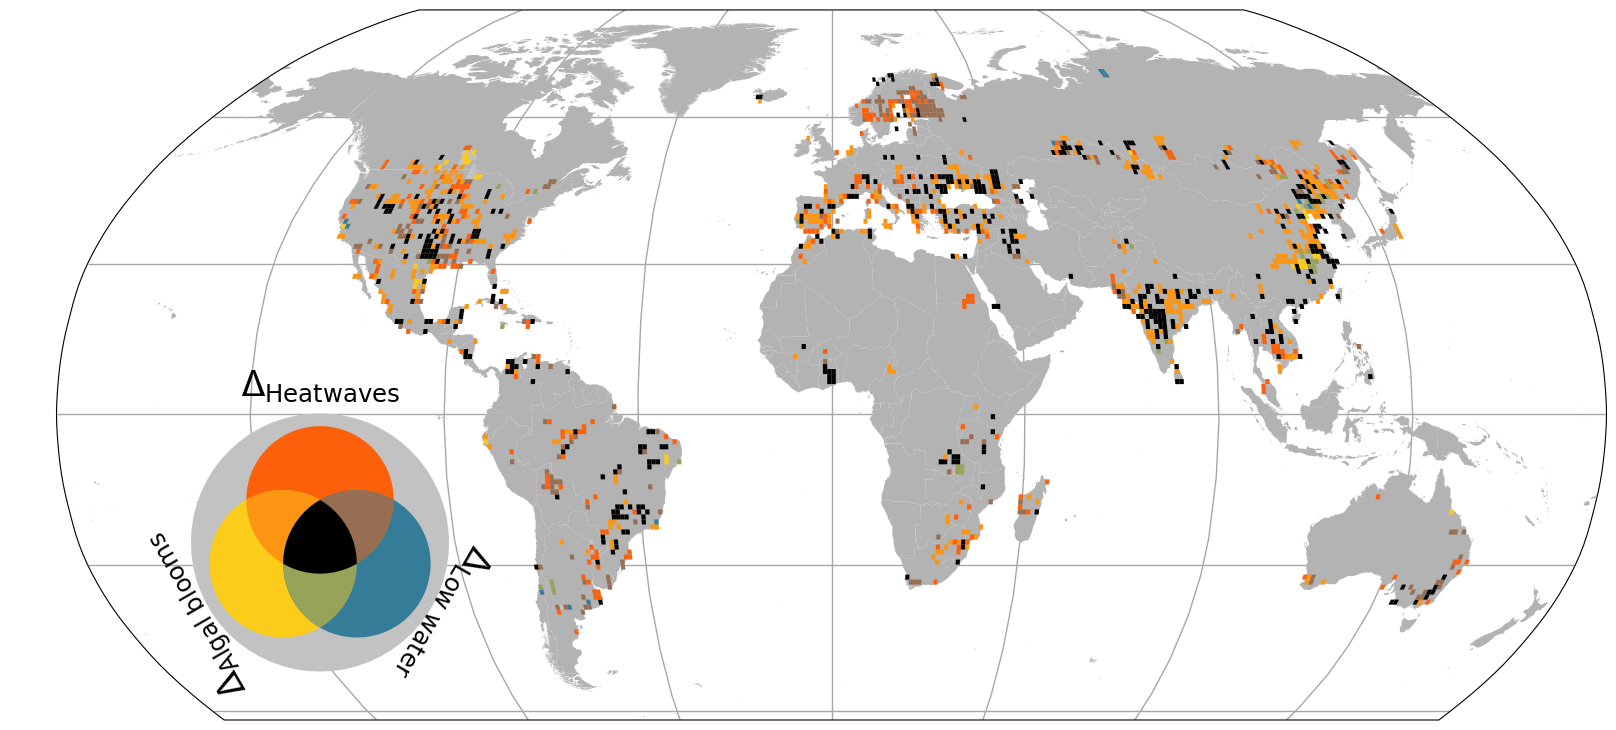

In [7]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.Robinson()}, figsize=(20, 13))

##########################################################################################

lines2.plot(ax=ax, color='#a7a7a7',lw=1, transform=ccrs.PlateCarree(), zorder=1)
world.plot(ax=ax, transform=ccrs.PlateCarree(), facecolor='#b3b3b3', edgecolor='#b3b3b3', lw=0, zorder=2)

gdf.plot(ax=ax, transform=ccrs.PlateCarree(), color=gdf['color'], legend=False, 
         marker='o', markersize=10, zorder=3)
ax.set_ylim(-6525154.6651, 8625154.6651)

cax = ax.inset_axes([-0.03, 0.05, 0.4, 0.4])
cax.axis('equal')
cax.axis('off')

c1 = Point(1, 1.732).buffer(2)
c2 = Point(0, 0).buffer(2)
c3 = Point(2, 0).buffer(2)
c4 = Point(1, 1/1.732).buffer(3.5)

c12 = c1.intersection(c2)
c13 = c1.intersection(c3)
c23 = c2.intersection(c3)

c123 = c12.intersection(c3)

lgd = gpd.GeoDataFrame([])
lgd['geometry'] = [c4, c1, c2, c3, c12, c13, c23, c123]
lgd['color'] = ['#c2c2c2',hex1, hex2, hex3, hex12, hex13, hex23, '#000000']
lgd.plot(ax=cax, color=lgd['color'])

cax.text(0.5, 1.05, 'Δ$_\mathrm{Heatwaves}$',    ha='center', va='center', transform=cax.transAxes, fontsize=25)
cax.text(0.3, 0.25, 'Δ$_\mathrm{Algal\ blooms}$', ha='center', va='center', transform=cax.transAxes, fontsize=25, rotation=120)
cax.text(0.7, 0.25, 'Δ$_\mathrm{Low\ water}$',    ha='center', va='center', transform=cax.transAxes, fontsize=25, rotation=240)